In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns

import scipy
from scipy.stats import pearsonr

import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

all_df = pd.read_csv('housing.csv')

In [2]:
all_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: xlabel='median_house_value', ylabel='Count'>

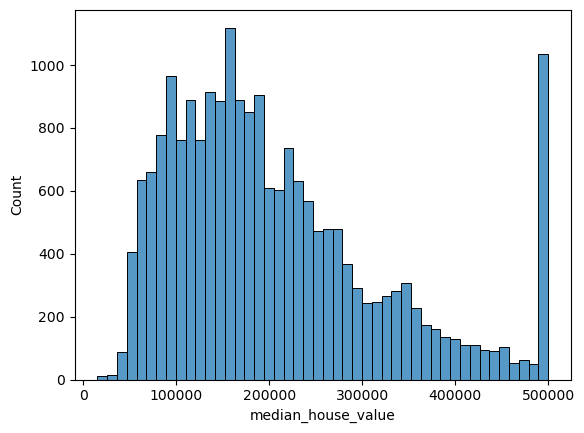

In [4]:
sns.histplot(x="median_house_value", data=all_df)

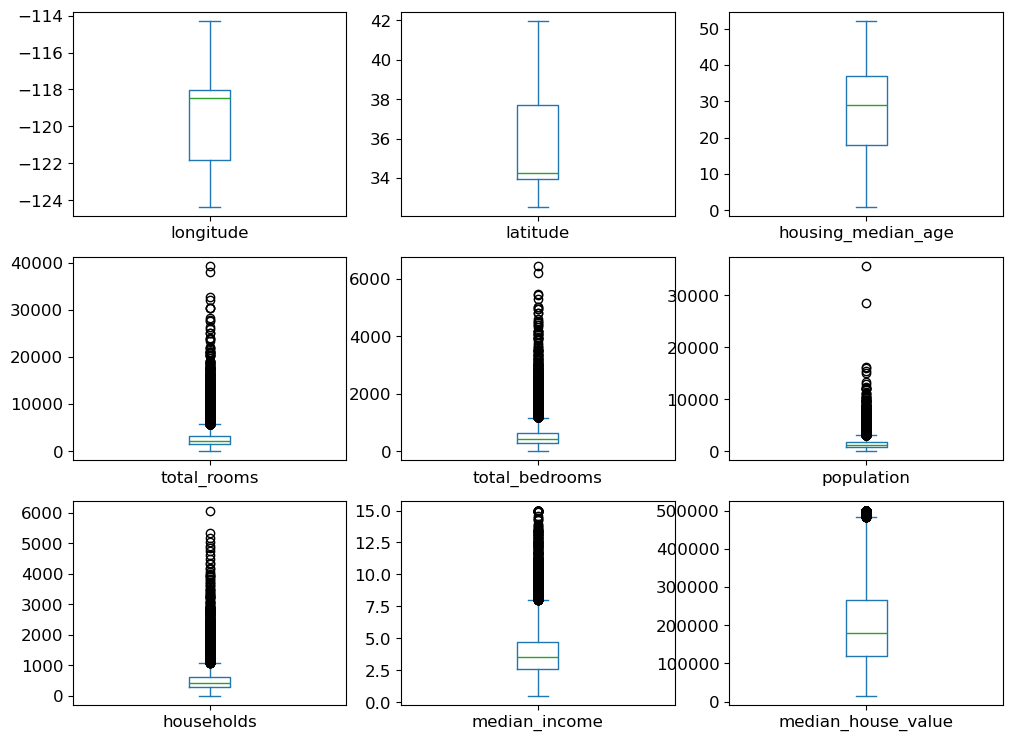

In [5]:
feautures_to_boxplot = all_df.iloc[:,:9]
feautures_to_boxplot.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=12, figsize=(12,9));

In [6]:
corrMatt = all_df.corr(numeric_only=True)
print(corrMatt)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

In [7]:
# X = all_df.drop(['median_house_value', 'total_rooms', 'households', 'population'], axis=1) # removing more highly correlated features
X = all_df.drop(['median_house_value', 'total_rooms'], axis=1)
y = all_df['median_house_value']

In [8]:
X

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_cat_encoded = cat_encoder.fit_transform(X[['ocean_proximity']])
cat_feature_names = cat_encoder.get_feature_names_out(['ocean_proximity'])

X_cat_df = pd.DataFrame(X_cat_encoded, columns=cat_feature_names, index=X.index)
X = pd.concat([X, X_cat_df], axis=1)

In [10]:
X = X.drop('ocean_proximity', axis=1)

In [11]:
X

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,374.0,845.0,330.0,1.5603,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,150.0,356.0,114.0,2.5568,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,485.0,1007.0,433.0,1.7000,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,409.0,741.0,349.0,1.8672,0.0,1.0,0.0,0.0,0.0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 15961 to 235
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_bedrooms              16349 non-null  float64
 4   population                  16512 non-null  float64
 5   households                  16512 non-null  float64
 6   median_income               16512 non-null  float64
 7   ocean_proximity_<1H OCEAN   16512 non-null  float64
 8   ocean_proximity_INLAND      16512 non-null  float64
 9   ocean_proximity_ISLAND      16512 non-null  float64
 10  ocean_proximity_NEAR BAY    16512 non-null  float64
 11  ocean_proximity_NEAR OCEAN  16512 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 4712 to 11878
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   4128 non-null   float64
 1   latitude                    4128 non-null   float64
 2   housing_median_age          4128 non-null   float64
 3   total_bedrooms              4084 non-null   float64
 4   population                  4128 non-null   float64
 5   households                  4128 non-null   float64
 6   median_income               4128 non-null   float64
 7   ocean_proximity_<1H OCEAN   4128 non-null   float64
 8   ocean_proximity_INLAND      4128 non-null   float64
 9   ocean_proximity_ISLAND      4128 non-null   float64
 10  ocean_proximity_NEAR BAY    4128 non-null   float64
 11  ocean_proximity_NEAR OCEAN  4128 non-null   float64
dtypes: float64(12)
memory usage: 419.2 KB


In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

feature_to_impute = ['total_bedrooms']

imputer.fit(X_train[feature_to_impute])

X_train[feature_to_impute] = imputer.transform(X_train[feature_to_impute])
X_test[feature_to_impute] = imputer.transform(X_test[feature_to_impute])

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 15961 to 235
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_bedrooms              16512 non-null  float64
 4   population                  16512 non-null  float64
 5   households                  16512 non-null  float64
 6   median_income               16512 non-null  float64
 7   ocean_proximity_<1H OCEAN   16512 non-null  float64
 8   ocean_proximity_INLAND      16512 non-null  float64
 9   ocean_proximity_ISLAND      16512 non-null  float64
 10  ocean_proximity_NEAR BAY    16512 non-null  float64
 11  ocean_proximity_NEAR OCEAN  16512 non-null  float64
dtypes: float64(12)
memory usage: 1.6 MB


In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 4712 to 11878
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   4128 non-null   float64
 1   latitude                    4128 non-null   float64
 2   housing_median_age          4128 non-null   float64
 3   total_bedrooms              4128 non-null   float64
 4   population                  4128 non-null   float64
 5   households                  4128 non-null   float64
 6   median_income               4128 non-null   float64
 7   ocean_proximity_<1H OCEAN   4128 non-null   float64
 8   ocean_proximity_INLAND      4128 non-null   float64
 9   ocean_proximity_ISLAND      4128 non-null   float64
 10  ocean_proximity_NEAR BAY    4128 non-null   float64
 11  ocean_proximity_NEAR OCEAN  4128 non-null   float64
dtypes: float64(12)
memory usage: 419.2 KB


In [18]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_2d = y_train.values.reshape(-1, 1)
y_train_scaled = scaler_y.fit_transform(y_train_2d)
y_train_scaled = y_train_scaled.ravel()

y_test_2d = y_test.values.reshape(-1, 1)
y_test_scaled = scaler_y.transform(y_test_2d)
y_test_scaled = y_test_scaled.ravel()

<Axes: >

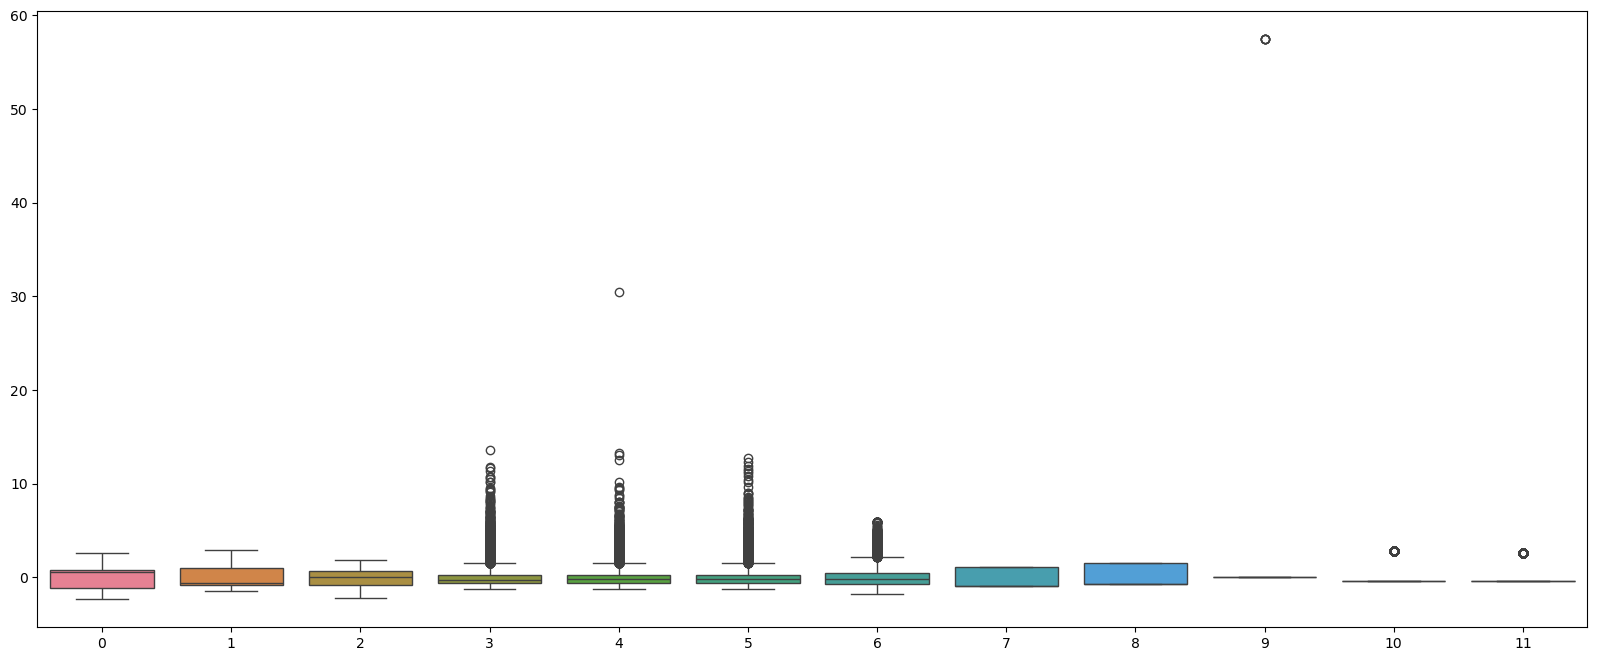

In [19]:
fig,ax = plt.subplots(1, figsize=(20,8))
# sns.boxplot(data=X_train_scaled[:, :7], ax=ax)
sns.boxplot(data=X_train_scaled, ax=ax)

In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

configs = [
    {"hidden_layers_setup": (20,),},
    {"hidden_layers_setup": (50,),},
    {"hidden_layers_setup": (100,),},
    {"hidden_layers_setup": (50, 25),},
    {"hidden_layers_setup": (100, 50),},
    {"hidden_layers_setup": (100, 50, 25),},
]

activation_functions= ["relu", "tanh"]
learning_rates = [0.0001, 0.001, 0.01, 0.1]

results = []
best_mses = []
i = 0  # i is used to iterate over the hidden layer setups and for slicing

while i < len(configs):
    print(f"> TRAINING with hidden_layers_setup = {configs[i]['hidden_layers_setup']}\n" + "-"*65)
    
    for activation_function in activation_functions:

        for learning_rate in learning_rates:
            print(f"activation_function = {activation_function}; learning_rate = {learning_rate}")
            
            mlp_cv = MLPRegressor(hidden_layer_sizes=configs[i]['hidden_layers_setup'], 
                                  learning_rate_init=learning_rate, 
                                  activation=activation_function,
                                  random_state=1, 
                                  max_iter=5000, 
                                  early_stopping=True
                                 )
            
            scores = cross_val_score(mlp_cv, X_train_scaled, y_train_scaled, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        
            average_mse = np.mean(-scores)
            average_rmse = np.sqrt(average_mse)
            average_mse_std = np.std(-scores)
        
            results.append({
                'config': configs[i]['hidden_layers_setup'],
                'learning_rate': learning_rate,
                'activation_function': activation_function,
                'average_mse': average_mse,
                'average_mse_std': average_mse_std,
            })
            
            print(f"average_mse = {average_mse:.4f}; average_rmse = {average_rmse:.4f}; std_mse = {average_mse_std:.4f}\n")
        
        print("-"*35)
    
    print(f"FINISHED TRAINING.\n")

    n = len(learning_rates) * len(activation_functions)
    slice_start = i*n
    slice_end = slice_start + n
    
    last_n_results = results[slice_start:slice_end:1]
    
    each_hidden_layer_setup_mse = []
    j = 0
    
    while j < n:
        each_hidden_layer_setup_mse.append(last_n_results[j]['average_mse'])
        j += 1

    best_mse = min(each_hidden_layer_setup_mse)

    best_mses.append(best_mse)
    
    print(f"Best MSE = {best_mse:.4f}\n")
    print(f"Best Set of Hyper Parameters for hidden_layers_setup = {configs[i]['hidden_layers_setup']}:")
    print(f"learning_rate = {last_n_results[each_hidden_layer_setup_mse.index(best_mse)]['learning_rate']}")
    print(f"activation_function = {last_n_results[each_hidden_layer_setup_mse.index(best_mse)]['activation_function']}")
    
    print("-"*65 + "\n\n")
    
    i += 1


all_mses = []

j = 0
while j < len(results):
    all_mses.append(results[j]['average_mse'])
    j += 1

overall_best_mse = min(all_mses)

print(f"best_mses = {best_mses}\n")

best_hidden_layers_setup = results[all_mses.index(overall_best_mse)]['config']
best_learning_rate = results[all_mses.index(overall_best_mse)]['learning_rate']
best_activation_function = results[all_mses.index(overall_best_mse)]['activation_function']

print("BEST HYPERPARAMETER SET OVERALL:\n")
print(f"hidden_layers_setup = {best_hidden_layers_setup}")
print(f"learning_rate = {best_learning_rate}")
print(f"activation_function = {best_activation_function}\n")
print(f"average_mse = {results[all_mses.index(overall_best_mse)]['average_mse']}")

> TRAINING with hidden_layers_setup = (20,)
-----------------------------------------------------------------
activation_function = relu; learning_rate = 0.0001
average_mse = 0.2756; average_rmse = 0.5250; std_mse = 0.0108

activation_function = relu; learning_rate = 0.001
average_mse = 0.2505; average_rmse = 0.5005; std_mse = 0.0106

activation_function = relu; learning_rate = 0.01
average_mse = 0.2480; average_rmse = 0.4980; std_mse = 0.0134

activation_function = relu; learning_rate = 0.1
average_mse = 0.2679; average_rmse = 0.5176; std_mse = 0.0107

-----------------------------------
activation_function = tanh; learning_rate = 0.0001
average_mse = 0.2764; average_rmse = 0.5257; std_mse = 0.0098

activation_function = tanh; learning_rate = 0.001
average_mse = 0.2446; average_rmse = 0.4946; std_mse = 0.0107

activation_function = tanh; learning_rate = 0.01
average_mse = 0.2334; average_rmse = 0.4831; std_mse = 0.0095

activation_function = tanh; learning_rate = 0.1
average_mse = 0.2

In [21]:
mlp_final = MLPRegressor(
    hidden_layer_sizes = best_hidden_layers_setup,
    learning_rate_init = best_learning_rate,
    activation = best_activation_function,
    random_state = 1,
    max_iter = 2000,
    early_stopping = True
)

mlp_final.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = mlp_final.predict(X_test_scaled)

In [22]:
y_pred = y_pred_scaled.reshape(-1, 1)
y_pred = scaler_y.inverse_transform(y_pred)
y_pred = y_pred.ravel()

In [23]:
y_pred

array([391452.39554353,  64862.13506733, 236652.02483792, ...,
       317577.56596141, 214222.03270501, 105895.18630744])

In [24]:
from sklearn.metrics import mean_squared_error

test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse:.2f}")

Test MSE: 2913470848.540982
Test RMSE: 53976.58


In [25]:
mlp_final.score(X_test_scaled, y_test_scaled)

0.7778843343428627